In [19]:
import numpy as np
import pandas as pd
df = pd.read_csv('Loan_Data.csv')
print(df.head())

   customer_id  credit_lines_outstanding  loan_amt_outstanding  \
0      8153374                         0           5221.545193   
1      7442532                         5           1958.928726   
2      2256073                         0           3363.009259   
3      4885975                         0           4766.648001   
4      4700614                         1           1345.827718   

   total_debt_outstanding       income  years_employed  fico_score  default  
0             3915.471226  78039.38546               5         605        0  
1             8228.752520  26648.43525               2         572        1  
2             2027.830850  65866.71246               4         602        0  
3             2501.730397  74356.88347               5         612        0  
4             1768.826187  23448.32631               6         631        0  


In [21]:
print(df['fico_score'].max(), df['fico_score'].min())

850 408


<Axes: >

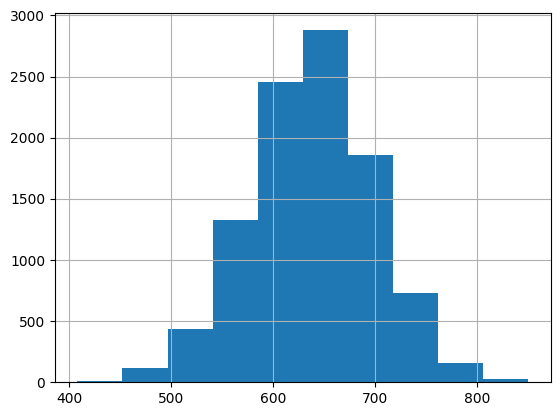

In [23]:
df['fico_score'].hist()

In [33]:
import pandas as pd
from math import log

x = df['default'].to_list()
y = df['fico_score'].to_list()
n = len(x)
print (len(x), len(y))

default = [0 for i in range(851)]
total = [0 for i in range(851)]

for i in range(n):
    y[i] = int(y[i])
    default[y[i]-300] += x[i]
    total[y[i]-300] += 1
    
for i in range(0, 551):
    default[i] += default[i-1]
    total[i] += total[i-1]
    
import numpy as np
    
def log_likelihood(n, k):
    p = k/n
    if (p==0 or p==1):
        return 0
    return k*np.log(p)+ (n-k)*np.log(1-p)

r = 10
dp = [[[-10**18, 0] for i in range(551)] for j in range(r+1)]

for i in range(r+1):
    for j in range(551):
        if (i==0):
            dp[i][j][0] = 0
        else:
            for k in range(j):
                if (total[j]==total[k]):
                    continue
                if (i==1):
                    dp[i][j][0] = log_likelihood(total[j], default[j])
                else:
                    if (dp[i][j][0] < (dp[i-1][k][0] + log_likelihood(total[j]-total[k], default[j] - default[k]))):
                        dp[i][j][0] = log_likelihood(total[j]-total[k], default[j]-default[k]) + dp[i-1][k][0]
                        dp[i][j][1] = k

10000 10000


In [34]:
print (round(dp[r][550][0], 4))
                                                     
k = 550
l = []
while r >= 0:
    l.append(k+300)
    k = dp[r][k][1]
    r -= 1

print(l)

-4217.8245
[850, 753, 752, 732, 696, 649, 611, 580, 552, 520, 300]
